# Tensorflow!

## Chris Rytting

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


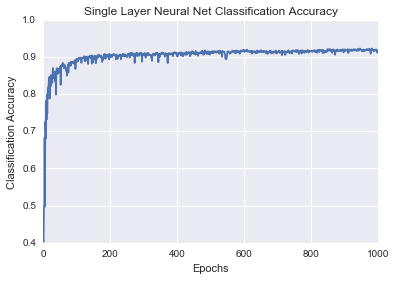

In [2]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)


# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Train
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

accuracy_hist = []
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run( train_step, feed_dict = {x: batch_xs, y_: batch_ys})
    accuracy_hist.append(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

plt.plot(accuracy_hist)
plt.title("Single Layer Neural Net Classification Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Classification Accuracy")
plt.show()

We have an accuracy of roughly 92% at the end of our training. Apparently this is not that accurate as neural nets go. Let's add another layer and see if we can't get a little more accurate a model.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


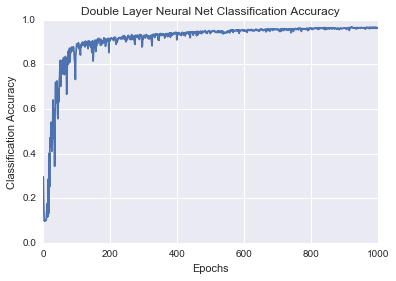

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable( tf.random_normal( [784, 200], stddev=0.001 ))
W2 = tf.Variable( tf.random_normal( [200, 10], stddev=0.001 ))


a = tf.matmul(x,W1)
a_relu = tf.nn.relu(a)
scores = tf.matmul(a_relu, W2)
#What to do with bias?
#b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(scores)
#y = tf.nn.softmax(tf.matmul(scores, W) + b)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Train
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

accuracy_hist = []
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run( train_step, feed_dict = {x: batch_xs, y_: batch_ys})
    accuracy_hist.append(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

plt.plot(accuracy_hist)
plt.title("Double Layer Neural Net Classification Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Classification Accuracy")
plt.show()

While the scale is a little off as compared to the last plot, this neural net achieves a 96-97% accuracy after 1000 epochs, which is quite an improvement. 